In [1]:
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd "gdrive/MyDrive/final390"

/content/gdrive/MyDrive/final390


In [3]:
model = tf.keras.models.load_model('./vgg_transfer.h5')
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

[[4.3270793]]


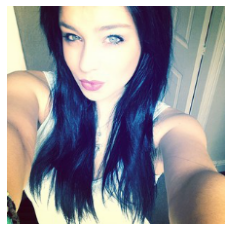

In [4]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
def preprocess_image(image):
    image = mpimg.imread(image)
    #image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = tf.keras.preprocessing.image.smart_resize(image, (224, 224))
    image = np.rot90(image, k=0, axes=(0,1))
    image = image.astype('uint8')
    imgplot = plt.imshow(image)
    #plt.plot(image)
    plt.axis('off')
    return image

image = preprocess_image('./-1.jpg')
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
guess = model.predict(image)
print(guess)

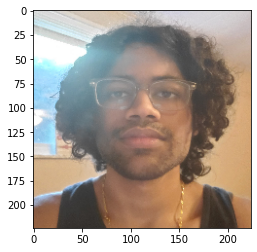

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
image = mpimg.imread('./2.jpg')
#image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = tf.keras.preprocessing.image.smart_resize(image, (224, 224))
image = np.rot90(image, k=3, axes=(0,1))
imgplot = plt.imshow(image.astype('uint8'))
plt.show()

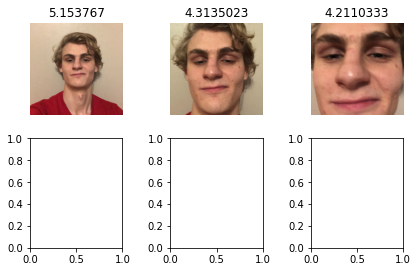

In [31]:
def preprocess_image_2(image):
    image = mpimg.imread(image)
    #image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = tf.keras.preprocessing.image.smart_resize(image, (224, 224))
    image = np.rot90(image, k=0, axes=(0,1))
    image = image.astype('uint8')
    #imgplot = plt.imshow(image)
    #plt.plot(image)
    #plt.axis('off')
    return image

f, axarr = plt.subplots(2, 3)
index = 19
for i in range(1):
    for j in range(3):
        image = preprocess_image_2('./pics/John/'+str(index)+'.jpg')
        #axarr[i,j].imshow(image, origin="lower")
        axarr[i,j].imshow(image)
        axarr[i,j].axis('off')
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        guess = model.predict(image)
        axarr[i,j].set_title(str(guess[0][0]))
        #plt.title(str(guess[0][0]))
        index += 3
plt.tight_layout()
plt.savefig("john_face_matrix")

In [18]:
!pwd

/content/gdrive/My Drive/final390


In [19]:
!ls './pics/Rasvik'

 10.jpg        13.jpg   16.jpg	 1.jpg	      4.jpg	   7.jpg
'11 (1).jpg'   14.jpg   17.jpg	'2 (1).jpg'   5.jpg	   8.jpg
 12.jpg        15.jpg   18.jpg	 3.jpg	     '6 (1).jpg'   9.jpg
